# Support Vector Machines

SVM é um classificador linear binário não probabilístico. O SVM tenta encontrar uma linha de separação entre as duas classes.<br/>
Os algoritmos de SVM geralmente são utilizados quando trabalhamos com um conjunto de dados mais complexos.

<img src="assets/svm00.png"/>

**Algumas características das SVM’s:**<br/>
* Em caso de outliers a SVM busca a melhor forma possível de classificação e, se necessário, desconsiderar o outlier.
* É um classificador criado para fornecer separação linear;
* Funciona  muito bem em domínios complicados, em que existe uma clara margem de separação;
* Não funciona bem em conjuntos de dados muito grandes, pois o tempo de treinamento é muito custoso;
* Não funciona bem em conjuntos de dados com grande quantidade de ruídos;
* Se as classes estiverem muito sobrepostas deve-se utilizar apenas evidências independentes.


**O que são SVM’s**<br/>
Support Vector Machines (SVM’s) são modelos de ML supervisionada, que possuem algoritmos de aprendizagem que analisam dados e reconhecem padrões, utilizados para classificação e análise de regressão.<br/>
O algoritmo escolhe a linha de hiperplano baseado nas melhores margens possíveis.<br/>
Caso os dados não sejam linearmente separáveis, o algoritmo utiliza um conceito chamado Kernel Trick (truque do kernel). O que ele faz na prática é adicionar uma nova coluna ao conjunto de dados, aumentando a dimensão dos dados, e assim separando em dois grupos. Com isso, torna-se possível traçar o hiperplano baseado nas margens.<br/>

<img src="assets/svm01.png"/>


**Teoria do aprendizado estatístico**<br/>
Aula: 09.06.02 Teoria do Aprendizado Estatístico

**SVM’s lineares x SVM’s não lineares**<br/>
* **Lineares**: O melhor hiperplano para uma SVM significa aquele com maior margem entre as duas classes.
* **Não lineares**: Alguns problemas de classificação binária não tem um hiperplano simples como um critério de separação útil. Um truque simples seria transformar as duas variáveis x e y em um novo espaço de característica envolvendo x (ou y) e uma nova variável z definida.


Como qualquer modelo de aprendizagem supervisionado, você primeiro treina uma máquina de vetores de suporte e, em seguida, valida o classificador.
Para conseguir um nível de acurácia satisfatório, precisamos fazer o tuning dos parâmetros das funções kernel.

**Métodos Kernel**<br/>
Em ML os métodos kernel são uma classe de algoritmos para análise de padrões. As mais conhecidas são as SVM’s.<br/>
O truque do kernel substitui os atributos(preditores) por uma função kernel. Qualquer modelo linear pode se tornar não linear utilizando o truque do kernel.
Principais funções de Kernel utilizadas atualmente:

<img src="assets/svm02.png"/>

SVM’s com margens flexíveis e SVM’s com margens rígidas
Aula: 09.11 SVM's com Margens Rígidas x Margens Rígidas


## Dados Linearmente Separáveis

Na geometria euclidiana, a separabilidade linear é uma propriedade geométrica de um par de conjuntos de pontos. Isso é mais facilmente visualizado em duas dimensões (o plano euclidiano) por pensar em um conjunto de pontos como sendo de cor azul e o outro conjunto de pontos como sendo de cor rosa. Estes dois conjuntos são linearmente separáveis se existir pelo menos uma linha no plano com todos os pontos azuis em um lado da linha e todos os pontos vermelhos do outro lado. Esta ideia imediatamente generaliza para espaços euclidianos de dimensão superior se a linha for substituída por hiperplano.

## Dados Não Linearmente Separáveis

Em SVM, é fácil ter um hiperplano linear entre estas duas classes. Mas, a questão que surge é: e quando precisamos separar dados que não são linearmente separáveis? Para esses casos, o SVM tem uma técnica chamada truque do kernel (kernel trick). Estas são funções que tomam um espaço de entrada de baixa dimensão e transformam em um espaço com mais dimensões, isto é, converte problema não separável em um problema separável, essas funções são chamadas de kernels. Elas são mais úteis em problemas de separação não-linear. Simplificando, o SVM faz algumas transformações de dados extremamente complexas, em seguida, descobre o processo para separar os dados com base nos labels ou saídas que você definiu.

In [ ]:
from IPython.display import Image
Image(url = 'SVM_5.png')

## Construindo um Modelo SVM

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [7]:
# Importando os módulos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import matplotlib
from sklearn import svm, datasets
%matplotlib inline

In [8]:
# Versão dos pacotes principais
print ('numpy version:', np.__version__)
print ('scikit-learn version:', sk.__version__)
print ('matplotlib version:', matplotlib.__version__)

numpy version: 1.20.3
scikit-learn version: 1.0.2
matplotlib version: 3.5.1


In [9]:
# Carregando o dataset iris
iris = datasets.load_iris()

In [10]:
# Extraindo os 2 primeiros atributos para variáveis preditoras (x) e a variável target (y)
X = iris.data[:, :2] 
y = iris.target

Kernel: Temos várias opções disponíveis com kernel como, "linear", "rbf", "poly", "sigmoide", "precomputed" e outros (o valor padrão é "rbf"). Os kernels "rbf" e "poli" são úteis para hiperplano não-linear. Vejamos o exemplo, onde usamos o kernel linear em dois atributos do conjunto de dados da íris para classificar sua classe.

### Kernel Linear

Sugerimos que você use o kernel linear se você tiver um grande número de atributos (> 1000), porque é mais provável que os dados sejam linearmente separáveis no espaço de alta dimensão. 

In [11]:
# Criamos o modelo SVC (Support Vector Classification) e então fazemos fit dos dados
svc_model = svm.SVC(kernel = 'linear').fit(X, y)

In [12]:
svc_model

SVC(kernel='linear')

In [13]:
# Criando um meshgrid para o Plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

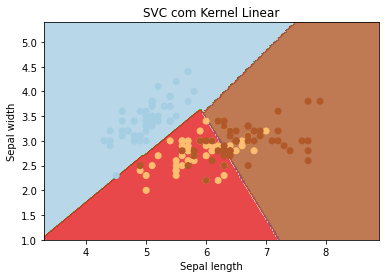

In [14]:
# Plot
plt.subplot(1, 1, 1)
Z = svc_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC com Kernel Linear')
plt.show()

### Kernel RBF

In [15]:
svc_model = svm.SVC(kernel = 'rbf').fit(X, y)

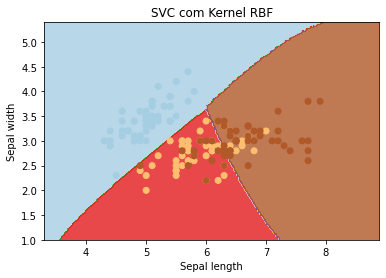

In [16]:
# Plot
plt.subplot(1, 1, 1)
Z = svc_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC com Kernel RBF')
plt.show()

Ao usar o RBF, não se esqueça de usar cross-validation para os seus parâmetros a fim de evitar overfitting.

### Fim

### Obrigado - Data Science Academy - <a href=http://facebook.com/dsacademy>facebook.com/dsacademybr</a>